# Prediction of Stock Price Direction

# Assignment
The task is to predict the day price direction of Amazon.com, Inc. (AMZN) stock.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

## Data Description
We have data for the period from 1997 up to year 2020 that we have split that into training (1997-2016), validation (2016-2018) and testing (2018-2020) periods. The data is available in the AMZN_train.csv, AMZN_val.csv and AMZN_test.csv files, respectively.

Each dataset has the same format with the following 7 columns:

Date - in format YYYY-MM-DD
Open - stock price upon opening of an exchange
High - the highest stock price on a given day
Low - the lowest stock price on a given day
Close - stock price at the end of a trading day
Adj Close - adjusted closing price that takes into account corporate actions
Volume - the amount of shares traded over the course of a trading day

## Practicalities
Define, train and evaluate a predictive model that takes as the input the data provided. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You may assume that any model resulting in AUC > 0.515 will be enough. You are expected to spend no more than 3 hours working on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1KcJHVPDFKjJ4l7DAZGo_8141SieXpCB0?usp=sharing"> Click here </a>

## Import the all necessary Libraries :

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# load the datasets
train = pd.read_csv('AMZN_train.csv')
val = pd.read_csv('AMZN_val.csv')
test = pd.read_csv('AMZN_test.csv')
# Show first few stepts of test dataset
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-15,1587.800049,1587.800049,1565.219971,1576.119995,1576.119995,5077500
1,2018-05-16,1577.500000,1594.430054,1576.670044,1587.280029,1587.280029,2570600
2,2018-05-17,1580.560059,1594.040039,1573.000000,1581.760010,1581.760010,2147600
3,2018-05-18,1581.329956,1583.589966,1572.099976,1574.369995,1574.369995,2642600
4,2018-05-21,1585.000000,1592.050049,1575.000000,1585.459961,1585.459961,2925200


In [7]:
# show the first few steps of train dataset
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [8]:
# show the first few steps of validation dataset
val.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,710.130005,713.250000,700.280029,710.659973,710.659973,5432900
1,2016-05-17,709.900024,714.469971,693.909973,695.270020,695.270020,5121400
2,2016-05-18,689.559998,702.539978,688.760010,697.450012,697.450012,4283200
3,2016-05-19,691.880005,699.400024,689.559998,698.520020,698.520020,3025600
4,2016-05-20,701.049988,707.239990,700.000000,702.799988,702.799988,2916200


## Step 1: Data Preprocessing :

In [10]:
# check the shape of the datasets
train.shape, test.shape, val.shape

((4781, 7), (504, 7), (503, 7))

In [11]:
# check the null values in train dataset
train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# check the null values in test dataset
test.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
# check the null values in validation dataset
val.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no null values 

In [15]:
# check the info of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [16]:
# check the info of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [17]:
# check the info of the validation dataset
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


In [18]:
# check the statistical data
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [19]:
# check the statistical data
test.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,1823.927758,1843.069246,1803.067065,1824.040536,1824.040536,4.705042e+06
std,178.129809,179.294163,177.457741,178.470078,178.470078,2.288185e+06
min,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,8.813000e+05
25%,1712.924988,1730.602447,1691.637543,1713.642517,1713.642517,3.078725e+06
50%,1806.539978,1824.244995,1791.289978,1806.119995,1806.119995,4.068450e+06
75%,1908.154968,1921.580048,1887.580017,1902.842468,1902.842468,5.763300e+06
max,2443.199951,2475.000000,2396.010010,2474.000000,2474.000000,1.556730e+07


In [20]:
# check the statistical data
val.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,992.201292,999.898131,982.574513,991.828966,991.828966,3.918924e+06
std,255.496588,259.220381,250.100614,254.885469,254.885469,2.069197e+06
min,689.559998,696.820007,682.119995,691.359985,691.359985,1.458800e+06
25%,780.500000,785.625000,772.410004,780.294983,780.294983,2.655050e+06
50%,948.000000,954.400024,941.140015,948.229980,948.229980,3.324800e+06
75%,1125.349976,1131.750000,1120.369995,1126.500000,1126.500000,4.469000e+06
max,1634.010010,1638.099976,1603.439941,1609.079956,1609.079956,1.656500e+07


create the target variable. The target will be 1 if the next day's closing price is higher than the opening price, otherwise 0.

In [131]:
# create a target variable for train dataset
train['target'] = (train['Close'].shift(-1) > train['Open']).astype(int)
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,taget,target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,0


In [41]:
# Create a target variable for test dataset
test['target'] = (test['Close'].shift(-1) > test['Open']).astype(int)
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,target
0,2018-05-15,1587.800049,1587.800049,1565.219971,1576.119995,1576.119995,5077500,0
1,2018-05-16,1577.500000,1594.430054,1576.670044,1587.280029,1587.280029,2570600,1
2,2018-05-17,1580.560059,1594.040039,1573.000000,1581.760010,1581.760010,2147600,0
3,2018-05-18,1581.329956,1583.589966,1572.099976,1574.369995,1574.369995,2642600,1
4,2018-05-21,1585.000000,1592.050049,1575.000000,1585.459961,1585.459961,2925200,0


In [45]:
# create a target variable for validation dataset
val['target'] = (val['Close'].shift(-1) > val['Open']).astype(int)
val.head()

,Date,Open,High,Low,Close,Adj Close,Volume,target
0,2016-05-16,710.130005,713.250000,700.280029,710.659973,710.659973,5432900,0
1,2016-05-17,709.900024,714.469971,693.909973,695.270020,695.270020,5121400,0
2,2016-05-18,689.559998,702.539978,688.760010,697.450012,697.450012,4283200,1
3,2016-05-19,691.880005,699.400024,689.559998,698.520020,698.520020,3025600,1
4,2016-05-20,701.049988,707.239990,700.000000,702.799988,702.799988,2916200,0


## Step 2: Exploratory Data Analysis (EDA) : 

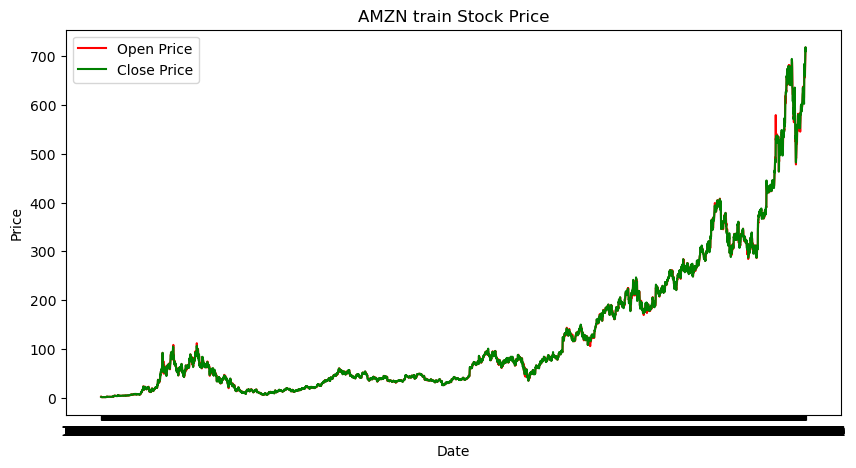

In [87]:
# plt the line chart using train dataset to check the close and open price
plt.figure(figsize=(10, 5))
plt.plot(train['Date'], train['Open'], color='r',label='Open Price')
plt.plot(train['Date'], train['Close'], color = 'g', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMZN train Stock Price')
plt.legend()
plt.show()

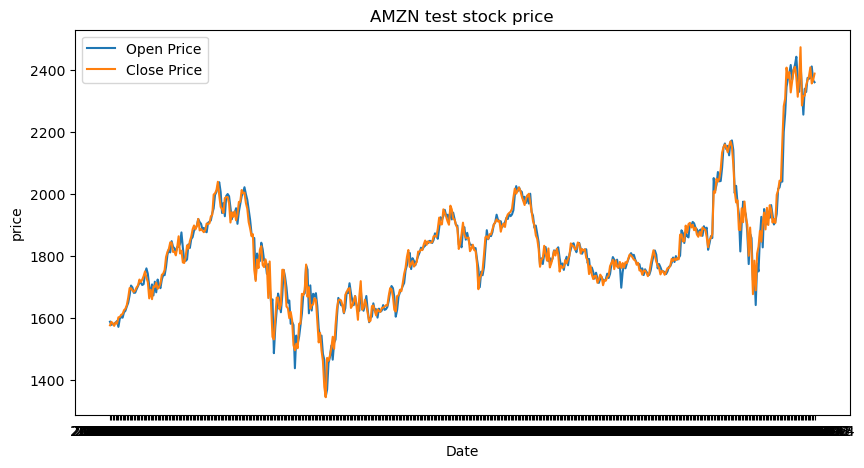

In [90]:
# plt the line chart using test dataset to check the close and open price
plt.figure(figsize=(10,5))
plt.plot(test['Date'], test['Open'], label = 'Open Price')
plt.plot(test['Date'], test['Close'], label = 'Close Price')
plt.xlabel('Date')
plt.ylabel('price')
plt.title('AMZN test stock price')
plt.legend()
plt.show()

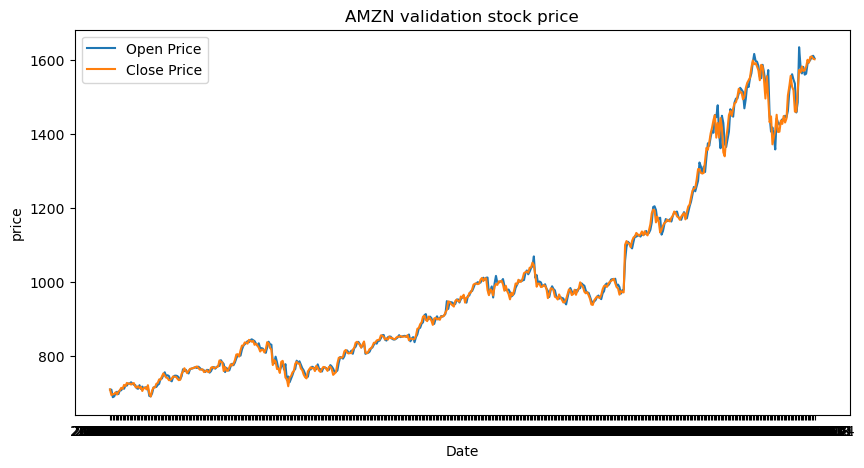

In [89]:
# plt the line chart using validation dataset to check the close and open price
plt.figure(figsize=(10,5))
plt.plot(val['Date'], val['Open'], label = 'Open Price')
plt.plot(val['Date'], val['Close'], label = 'Close Price')
plt.xlabel('Date')
plt.ylabel('price')
plt.title('AMZN validation stock price')
plt.legend()
plt.show()

## Step 3: Model Selection and Training :

We are using logistic regression. Why because this dataset is continuous data it means regression. 

In [205]:
# Split the datasets into target variable and feature variable
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

X_train = train[features]
y_train = train['target']

X_val = val[features]
y_val = val['target']

X_test = test[features]
y_test = test['target']

# shape of the variables
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((4781, 6), (4781,), (503, 6), (503,), (504, 6), (504,))

## Step 4: Validation :

In [257]:
# import the model library using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# evaluate the model
lr = LogisticRegression()

# fit the model
lr.fit(X_train, y_train)

# predit the X_test
y_pred_lr = lr.predict(X_val)

# predict the Accuracy and roc_auc score
lr_accuracy = accuracy_score(y_val, y_pred_lr)
lr_roc_auc = roc_auc_score(y_val, y_pred_lr)

# print the predicted scores
print('Accuracy score for Logistic Regression :',lr_accuracy)
print('ROC_AUC score for Logistic Regression :', lr_roc_auc)

Accuracy score for Logistic Regression : 0.5427435387673957
ROC_AUC score for Logistic Regression : 0.5


In Logistic Regression accuracy score is 54 %. Its not a good fit. We can check with other complex machine learning models. Here we are using Random forest classifier. Why because her target variable would be 1 or 0. so its a classification.

In [260]:
# import the algorithm to predict the values
from sklearn.tree import DecisionTreeClassifier

# Train a Random Forest model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the X_test
y_pred_dt = dt.predict(X_val)

# predict the accuracy and roc_auc_score
dt_accuracy = accuracy_score(y_val, y_pred_dt)
dt_roc_auc = roc_auc_score(y_val, y_pred_dt)

print('Decision tree Accuracy:', dt_accuracy)
print('Decision tree Validation AUC:',dt_roc_auc)

Decision tree Accuracy: 0.4393638170974155
Decision tree Validation AUC: 0.4711896798853321


In [265]:
# import the algorithm to predict the values
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# predict the X_test
y_pred_rfc = rfc.predict(X_val)

# predict the accuracy and roc_auc_score
rfc_accuracy = accuracy_score(y_val, y_pred_rfc)
rfc_roc_auc = roc_auc_score(y_val, y_pred_rfc)

print('Random Forest Accuracy:', rfc_accuracy)
print('Random Forest Validation AUC:',rfc_roc_auc)

Random Forest Accuracy: 0.44930417495029823
Random Forest Validation AUC: 0.49096193661411053


Comparing to logistic regression it predicts the Low accuracy 

In [267]:
# Evaluate on the test data using the best model
y_test_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')

Test Accuracy: 0.47619047619047616
Test AUC: 0.5056179775280899


## Step 5: Testing :

In [271]:
# Evaluate on the test data using the best model
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')

Test Accuracy: 0.47619047619047616
Test AUC: 0.4902100222822737


## Step 6: Evaluation :

In [293]:
# Summarize the performance
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Descision Tree'],
    'Validation Accuracy': [lr_accuracy, rfc_accuracy, dt_accuracy],
    'Validation AUC': [lr_roc_auc, rfc_roc_auc, dt_roc_auc],
    'Test Accuracy': [None, test_accuracy, dt_accuracy],
    'Test AUC': [None, test_auc, dt_roc_auc]
}

results_df = pd.DataFrame(results)
results_df

,Model,Validation Accuracy,Validation AUC,Test Accuracy,Test AUC
0,Logistic Regression,0.542744,0.500000,NaN,NaN
1,Random Forest,0.449304,0.490962,0.476190,0.49021
2,Descision Tree,0.439364,0.471190,0.439364,0.47119


## Step 7: Hyperparameter Tuning :

In [296]:
# import the grid search method
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# evaluate the model
gs = GridSearchCV(estimator = rfc,
                 param_grid = param_grid,
                 cv = 3,
                 verbose=2, 
                  scoring='roc_auc')

# fit the model
gs.fit(X_train, y_train)

# Display the best parameters found by the grid search
print('Best Parameters :', gs.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total t

In [300]:
Best Parameters : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


Best Parameters : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [306]:
best_rf_model = gs.best_estimator_
print('Best Estimators :',best_rf_model)

Best Estimators : RandomForestClassifier(min_samples_leaf=3, n_estimators=50)


In [324]:
# Validate the model with the best parameters
y_val_pred_best = best_rf_model.predict(X_val)

# predict the accuracy
print('Validation accuracy :', accuracy_score(y_val, y_val_pred_best))
print('Validation ROC_AUC score :', roc_auc_score(y_val, y_val_pred_best))

Validation accuracy : 0.4433399602385686
Validation ROC_AUC score : 0.4782767956681


In [326]:
# Test the model with the best parameters
y_test_pred_best = best_rf_model.predict(X_test)

# predict the accuracy
print('Test accuracy :', accuracy_score(y_test, y_test_pred_best))
print('Test ROC_AUC score :', roc_auc_score(y_test, y_test_pred_best))

Test accuracy : 0.4722222222222222
Test ROC_AUC score : 0.49144265870193904


Comparing to Validation accuracy its little bit high accuracy for Test set

## Step 8 : Conclusion :

The model's performance indicates that it struggles to predict the direction of Amazon's stock price accurately after done the Hyperparameter tuning also, Before the hyper-parameter tuning, Logistic regression predicts the 54 % of accuracy. not a good fit the model. with test and validation ROC AUC scores close to 0.5. it suggests no better performance of the models.

#### Thanks You !!!